# ML Tech Interview

Hello and welcome to the Machine Learning Tech Interview. This interview will be divided in two parts: the theoretical part and the practical/coding part. 

### **I will review only the scripts that will be sent (by pull request on this repo) by 1:00 pm**

Good Luck!!

## Theoretical Part

Please answer the following questions. 

#### What are the assumptions of a linear model (or any other type of model)?

#### What’s the difference between K Nearest Neighbor and K-means Clustering?

#### How do you address overfitting?

#### Explain Naive Bayes algorithms.

#### When do you use an AUC-ROC score? What kind of information can you gather from it?

#### What is cross validation?

#### What are confounding variables?

#### If an important metric for our company stopped appearing in our data source, how would you investigate the causes?

## Practical Machine Learning

In this challenge, you will showcase your knowledge in feature engineering, dimensionality reduction, model selection and evaluation, hyperparameter tuning, and any other techniques of machine learning.

There isn't a correct solution to this challenge. All we would like to learn is your thinking process that demonstrates your knowledge, experience, and creativity in developing machine learning models. Therefore, in addition to developing the model and optimizing its performance, you should also elaborate your thinking process and justify your decisions thoughout the iterative problem-solving process.

The suggested time to spend on this challenge is 90-120 minutes. If you don't have time to finish all the tasks you plan to do, simply document the to-dos at the end of your response.

#### Instructions:

- Download the housing prices data set (housing_prices.csv). The data is big enough to showcase your thoughts but not so that processing power will be a problem.
- Using Python, analyze the features and determine which feature set to select for modeling.
- Train and cross validate several regression models, attempting to accurately predict the SalePrice target variable.
- Evaluate all models and show comparison of performance metrics.
- State your thoughts on model performance, which model(s) you would select, and why.

#### Deliverables Checklist:

- Python code.
- Your thinking process.
- The features selected for machine learning.
- The results (e.g., performance metrics) of your selected model(s).

In [1]:
# import libaries

# import pandas and numpy for data manipulation and exploratory data analysis (set up for complete view on data)
import pandas as pd
pd.set_option('max_columns', 151)
pd.set_option('display.max_rows', None)
import numpy as np

# importing matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
data = pd.read_csv('housing_prices.csv')

# getting first overview
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [3]:
# checking for data size -> 1460 rows and 81 columns
data.shape

(1460, 81)

In [4]:
# there are some NaN (missing values) - getting overview
data_nan = data.isnull().sum().sort_values(ascending = False)
print(data_nan) 

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [5]:
# Columns: PoolQC, MiscFeature, Alley, Fence and FireplaceQu will be dropped because the percentage of NaN is very high.
# the amount of NaN in LotFrontage is about 17.8%

In [6]:
# dropping columns with high amount of missing values
to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
data.drop(columns=to_drop, inplace=True, axis=1)

In [7]:
# check for outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR) # IQR for each column -> some variables have only value of zero

Id                 729.50
MSSubClass          50.00
LotFrontage         21.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         166.00
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         41.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float

In [8]:
# calculated IQR score to filter out the outliers by keeping only valid values
data_out = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [9]:
# checking for values that had zero as value in IQR -> data is not useful  for columns: BsmtFinSF2, LowQualFinSF, BsmtHalfBath, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal     
data_out.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,563.000000,563.000000,456.000000,563.000000,563.000000,563.000000,563.00000,563.000000,558.00000,563.000000,563.0,563.000000,563.000000,563.000000,563.000000,563.0,563.000000,563.000000,563.0,563.000000,563.000000,563.000000,563.0,563.000000,563.000000,540.000000,563.000000,563.000000,563.000000,563.000000,563.0,563.0,563.0,563.0,563.0,563.000000,563.000000,563.000000
mean,740.840142,48.827709,68.535088,9223.186501,6.245115,5.365897,1983.31794,1989.236234,75.06810,445.175844,0.0,618.813499,1063.989343,1117.639432,308.987567,0.0,1426.626998,0.424512,0.0,1.607460,0.383659,2.806394,1.0,6.309059,0.550622,1986.253704,1.820604,477.801066,90.841918,41.245115,0.0,0.0,0.0,0.0,0.0,6.341030,2007.788632,179322.555950
std,420.783441,31.450019,15.030039,2727.016134,1.251458,0.704113,25.11497,19.590541,106.23516,410.417433,0.0,424.901382,298.843399,290.573239,416.625456,0.0,395.445475,0.498292,0.0,0.503102,0.486709,0.661467,0.0,1.315270,0.580384,22.441441,0.668137,186.530677,98.786002,45.009453,0.0,0.0,0.0,0.0,0.0,2.660681,1.321764,56145.210993
min,1.000000,20.000000,30.000000,2887.000000,2.000000,4.000000,1910.00000,1950.000000,0.00000,0.000000,0.0,0.000000,270.000000,438.000000,0.000000,0.0,438.000000,0.000000,0.0,1.000000,0.000000,1.000000,1.0,3.000000,0.000000,1914.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,37900.000000
25%,382.500000,20.000000,60.000000,7746.000000,5.000000,5.000000,1965.50000,1972.000000,0.00000,0.000000,0.0,280.000000,856.000000,874.500000,0.000000,0.0,1121.000000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1968.750000,2.000000,390.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,137475.000000
50%,762.000000,50.000000,69.500000,9018.000000,6.000000,5.000000,1996.00000,1999.000000,0.00000,442.000000,0.0,519.000000,1010.000000,1062.000000,0.000000,0.0,1430.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1997.500000,2.000000,480.000000,98.000000,33.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,176000.000000
75%,1104.500000,60.000000,78.000000,10800.000000,7.000000,6.000000,2004.00000,2005.000000,143.75000,744.000000,0.0,883.000000,1272.000000,1315.000000,728.000000,0.0,1670.500000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2004.000000,2.000000,576.000000,167.000000,64.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1456.000000,120.000000,109.000000,17600.000000,10.000000,7.000000,2009.00000,2010.000000,415.00000,1619.000000,0.0,1670.000000,2000.000000,2117.000000,1349.000000,0.0,2622.000000,2.000000,0.0,3.000000,1.000000,4.000000,1.0,10.000000,2.000000,2010.000000,3.000000,928.000000,404.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,339750.000000


In [10]:
# dropping columns with unique value zero
to_drop2 = ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] 
data_out.drop(columns=to_drop2, inplace=True, axis=1)

C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
# check for size after cleaning -> data set is reduced by 897 rows and 13 columns due to dropping columns with high amount of missing values, or no/unique information and elimination of outlier
data_out.shape 

(563, 68)

In [12]:
# rename dataframe
data_clean = data_out

In [13]:
# check for variable/value types
data_clean.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


In [14]:
# target variable = SalePrice -> int values
# check for unique values
data_clean['SalePrice'].value_counts() # -> the houses have very different prices  

135000    7
140000    7
110000    6
230000    6
190000    5
181000    5
173000    5
178000    5
139000    5
132500    5
176000    5
185000    5
155000    4
115000    4
189000    4
100000    4
187500    4
158000    4
192000    4
215000    4
214000    4
152000    4
220000    4
180000    4
225000    3
129500    3
145000    3
227000    3
124500    3
196000    3
82500     3
144000    3
143000    3
210000    3
200000    3
148000    3
250000    3
160000    3
130000    3
290000    3
191000    3
174000    3
127000    3
108000    3
142500    3
132000    3
285000    2
142000    2
128000    2
184000    2
204000    2
141000    2
119500    2
112000    2
205000    2
143500    2
131500    2
202500    2
226000    2
222500    2
221000    2
194000    2
195000    2
109000    2
149900    2
197000    2
179000    2
193000    2
150000    2
128500    2
149000    2
219500    2
203000    2
113000    2
236000    2
120000    2
105000    2
109900    2
232000    2
188000    2
187000    2
207500    2
102000    2
1999

In [15]:
# correlations in data set stored in variable correlation
correlation = data_clean.corr()

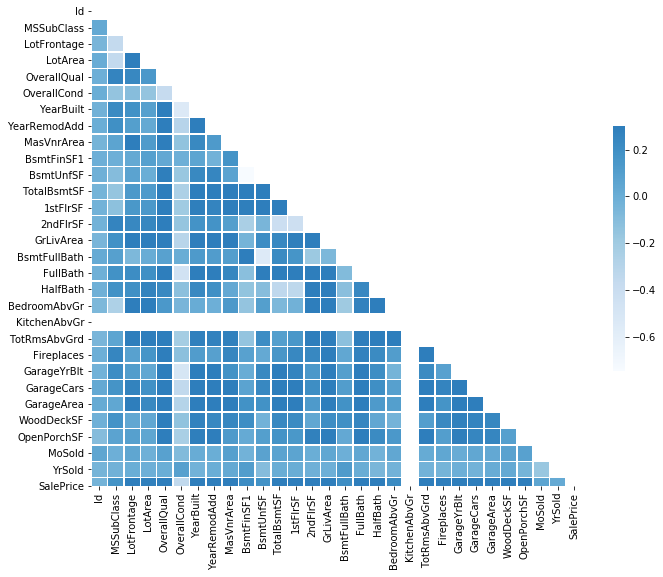

In [16]:
# correlation visualization
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap='Blues', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
# all correlations are not very high/strong -> the variables can be kept for further modeling
# dataset does not contain columns that are correlated for over 90%

In [18]:
# variables with datatype object
objects = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [19]:
# check the values for each column and what kind of information they hold
for col in data_clean.columns[2:]:
    print(data_clean[col].unique())

['RL' 'RM' 'FV' 'RH']
[ 65.  68.  84.  75.  70.  91.  66. 101.  44.  98.  nan  85.  60. 108.
  61.  89.  63.  76.  72.  47.  69.  80.  78.  73.  77.  94.  74.  55.
  48.  88.  71.  51.  92. 100.  95.  86.  62.  50.  40.  83.  43.  82.
  52.  64.  30.  34.  37.  32.  59.  57.  79.  93.  53.  41. 105.  90.
  58.  54.  81. 106.  56.  39.  67.  36.  35.  96. 103. 109. 107. 102.
  49.]
[ 8450 11250 14260 10084 11200 10652 13695  7560 14215  4224 11478  8544
 11049  7313 13418  7922  8658  7658 11096  7742  7134 11645  7200 13072
  6442  9591 10665  4608  7599  8475  8892  8070  9337 10264 10921 10603
  9206 10402  9525  7750  8536  8461  7892 17043  4388  7590 14200 12224
  7388  6853 10400 10355  9066 15426 10500  8520 10335  6120  9505  7500
  6240 14803 12003 12552 11120 12182  5500 10562  8244  9947  9017  7180
  8546  4438  3500 13673  8250 10420  8640  3010  8990  8068  9950  8521
  3182  7851  8773  8741  9000  8880 11310 11317  8366  8400  8738  8791
  8814  9588  8471  5232 11207  

In [20]:
# for example variable street only contains two values wich could be encoded in integers
data_clean['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [21]:
# dropping columns with high amount of missing values
to_drop3 = objects
data_clean.drop(columns=to_drop3, inplace=True, axis=1)

In [22]:
data_clean.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,1,8,0,2003.0,2,548,0,61,2,2008,208500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,434,920,920,866,1786,1,2,1,3,1,6,1,2001.0,2,608,0,42,9,2008,223500
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,9,1,2000.0,3,836,192,84,12,2008,250000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,317,1686,1694,0,1694,1,2,0,3,1,7,1,2004.0,2,636,255,57,8,2007,307000
10,11,20,70.0,11200,5,5,1965,1965,0.0,906,134,1040,1040,0,1040,1,1,0,3,1,5,0,1965.0,1,384,0,0,2,2008,129500


In [23]:
NaN = data_clean.isnull().sum().sort_values(ascending = False)
print(NaN)  # still some missing values in dataset

LotFrontage     107
GarageYrBlt      23
MasVnrArea        5
SalePrice         0
2ndFlrSF          0
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
YrSold            0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
MoSold            0
Id                0
dtype: int64


In [24]:
to_drop4 = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea'] 
data_clean.drop(columns=to_drop4, inplace=True, axis=1)

In [25]:
# import library for splitting the data -> percentage used for this dataset test (20%) and train (80%) 
from sklearn.model_selection import train_test_split

# defining target variable and independent variables
y = data_clean['SalePrice']
X = data_clean.drop(['SalePrice'], axis = 1)

In [26]:
# split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
# first model will be an regression model
# import library for LogisticRegression modeling
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # initialize the model
lr.fit(X_train,y_train) # fit the model
acc = lr.score(X_test,y_test)*100                            

print(f"Logistic Regression Test Accuracy {round(acc, 2)}%")

C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression Test Accuracy 1.77%


C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [28]:
X_train.shape

(450, 26)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100
print(f"3 neighbors KNN Score: {round(acc,2)}%")

3 neighbors KNN Score: 1.77%


### Final thoughts


##### I assume that I reduced the data due to cleaning to much. The performance of my models is very low. I would have had a closer look to the object variables and maybe I could have transformed or encoded them as well to involve them in my model. Other options for modeling would have been clustering methods. I could also have checked for the confusion matrix.